In [1]:
import numpy as np
from gsmmutils import ModelValidator, MyModel
from cobra.flux_analysis import pfba, flux_variability_analysis as fva
import gsmmutils
gsmmutils.DATA_PATH = "../results/ppp"
from cobra.io import to_json, save_json_model
from utils import *
import logging
logging.getLogger('cobra').setLevel(logging.CRITICAL)
logging.getLogger('gsmmutils').setLevel(logging.CRITICAL)
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations

In [2]:
original_model = MyModel(r"../data/model_no_carotenoids.xml", "e_Biomass__cytop")
constraint = original_model.problem.Constraint(
                original_model.reactions.R09503_hn438__lum.flux_expression + original_model.reactions.R09503_hn673__lum.flux_expression,
                lb=0,
                ub=199.44)
original_model.add_cons_vars(constraint)

Loading

Reactions: 4599
Metabolites: 3750
Genes: 1694
Model loaded


DM_C02094__chlo ('EX_C00244__dra', 'EX_C00059__dra')
DM_C02094__chlo ('EX_C00244__dra', 'EX_C00011__dra')
DM_C02094__chlo ('EX_C00244__dra', 'EX_C00009__dra')
DM_C02094__chlo ('EX_C00244__dra', 'EX_C00205__dra')
DM_C02094__chlo ('EX_C00059__dra', 'EX_C00011__dra')
DM_C02094__chlo ('EX_C00059__dra', 'EX_C00009__dra')
DM_C02094__chlo ('EX_C00059__dra', 'EX_C00205__dra')
DM_C02094__chlo ('EX_C00011__dra', 'EX_C00009__dra')
DM_C02094__chlo ('EX_C00011__dra', 'EX_C00205__dra')
DM_C02094__chlo ('EX_C00009__dra', 'EX_C00205__dra')
DM_C08601__chlo ('EX_C00244__dra', 'EX_C00059__dra')
DM_C08601__chlo ('EX_C00244__dra', 'EX_C00011__dra')
DM_C08601__chlo ('EX_C00244__dra', 'EX_C00009__dra')
DM_C08601__chlo ('EX_C00244__dra', 'EX_C00205__dra')
DM_C08601__chlo ('EX_C00059__dra', 'EX_C00011__dra')
DM_C08601__chlo ('EX_C00059__dra', 'EX_C00009__dra')
DM_C08601__chlo ('EX_C00059__dra', 'EX_C00205__dra')
DM_C08601__chlo ('EX_C00011__dra', 'EX_C00009__dra')
DM_C08601__chlo ('EX_C00011__dra', 'EX_C00205_

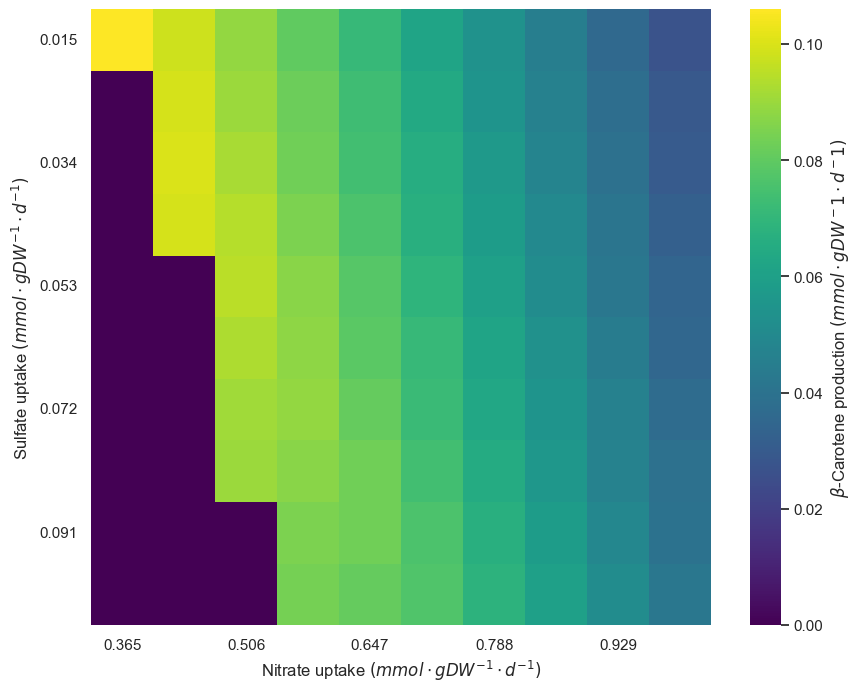

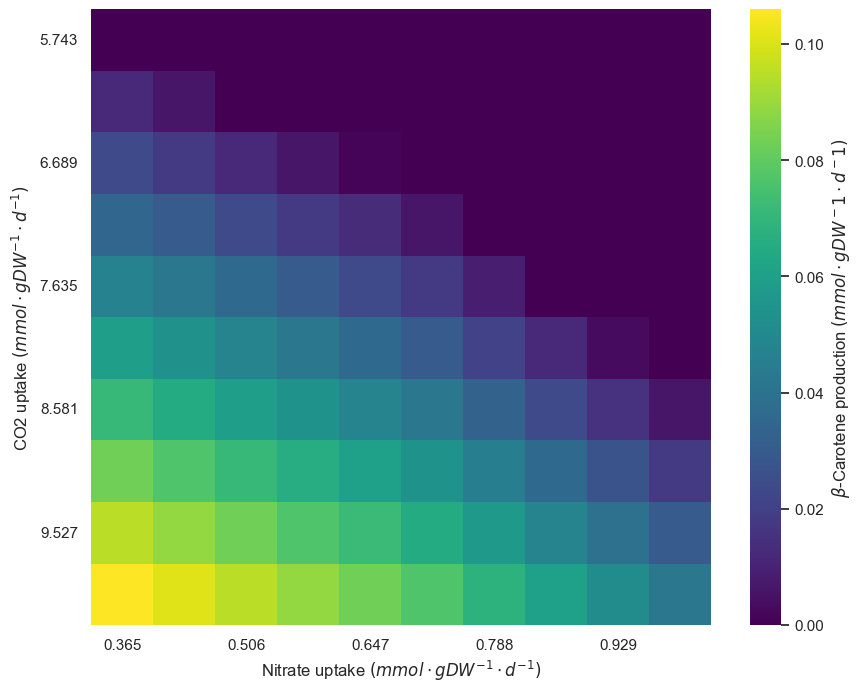

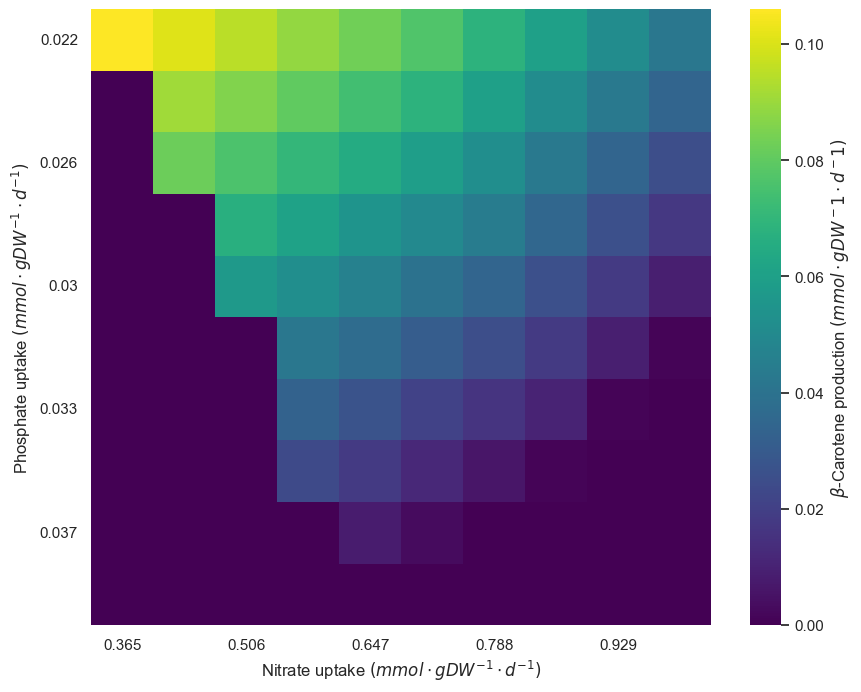

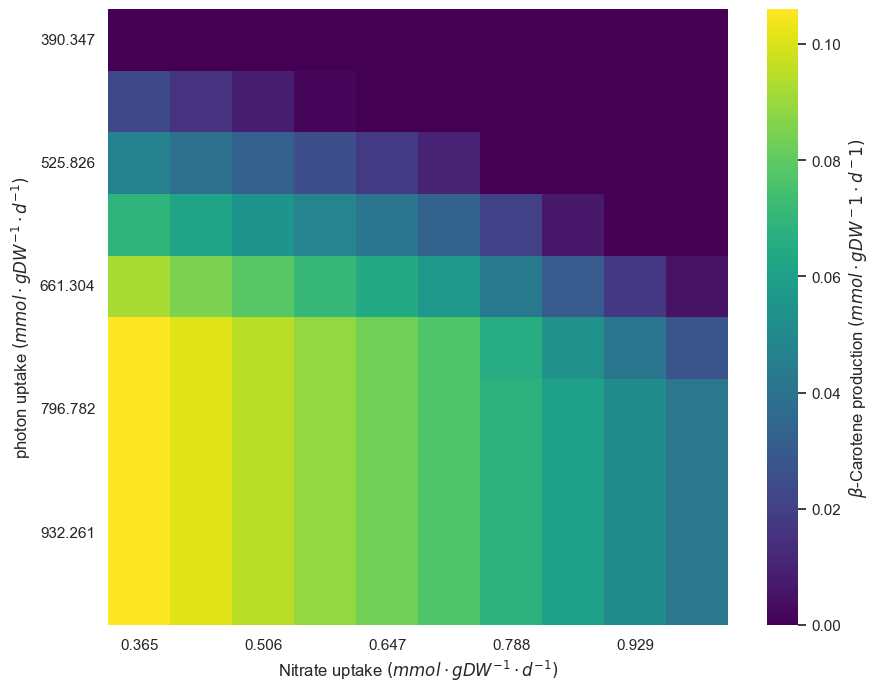

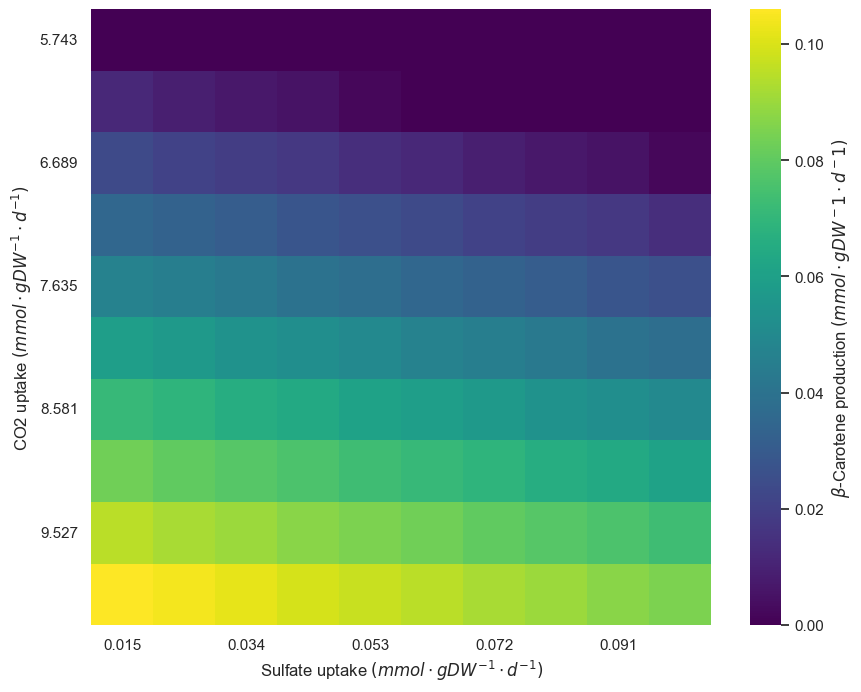

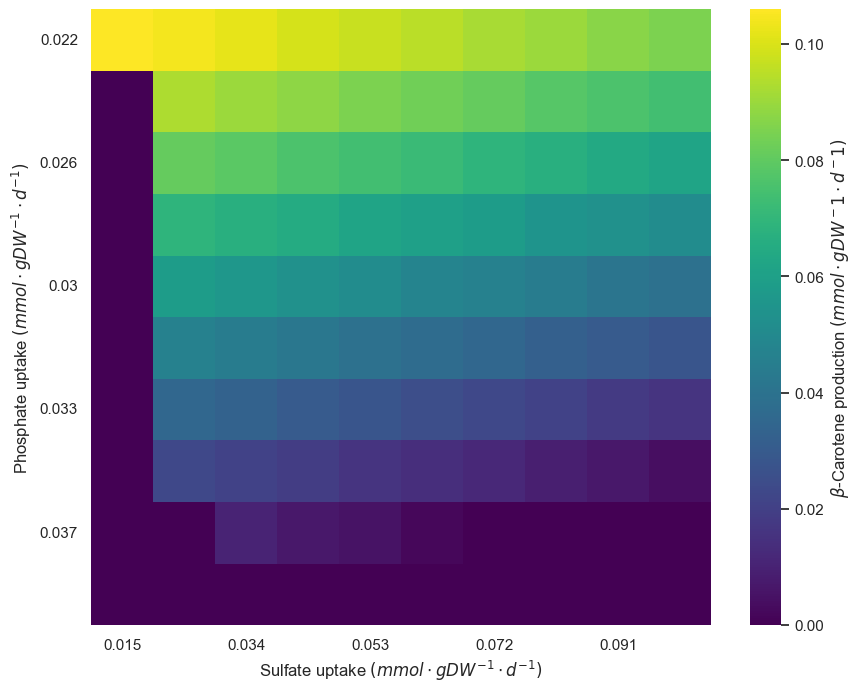

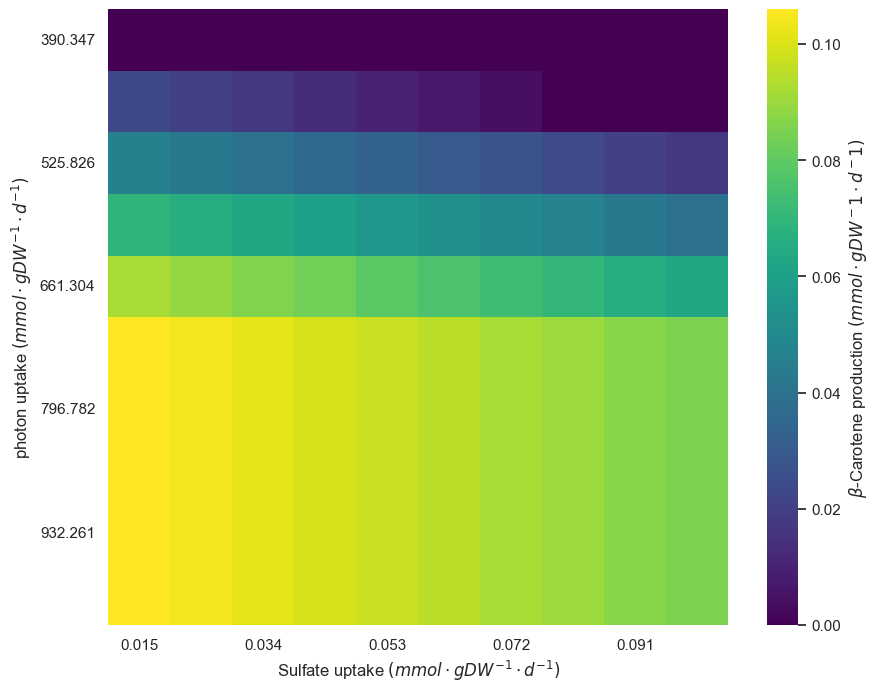

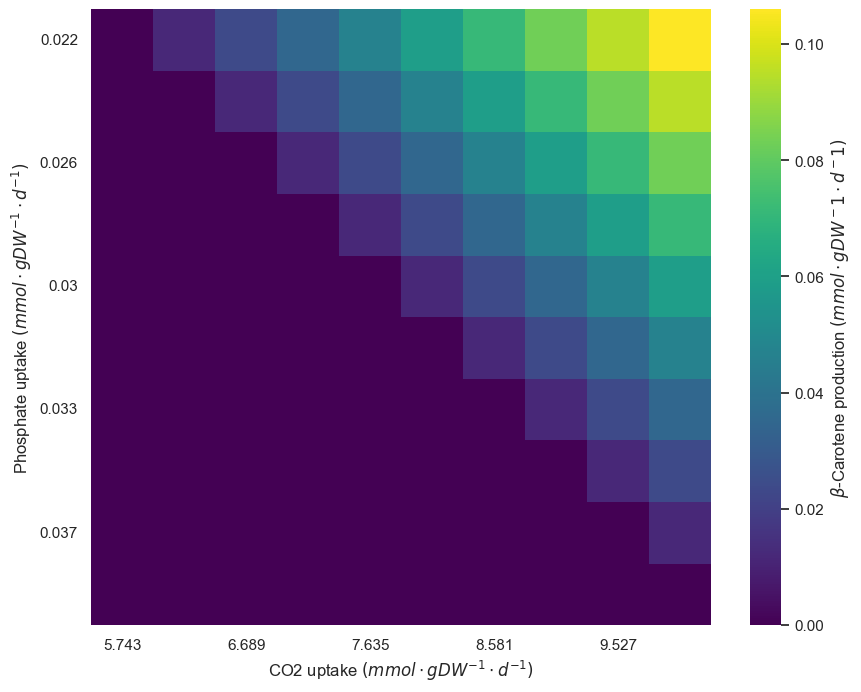

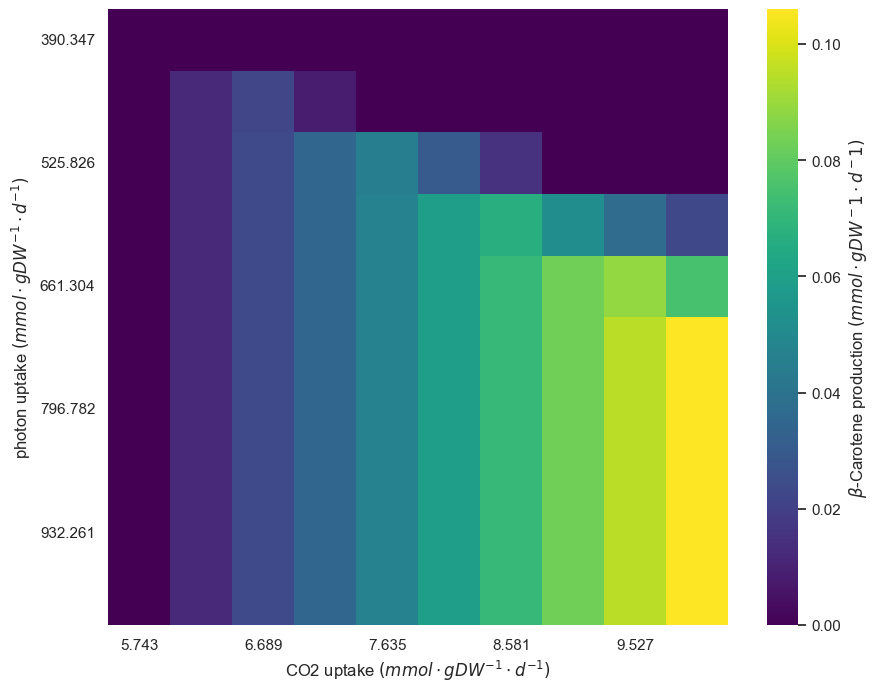

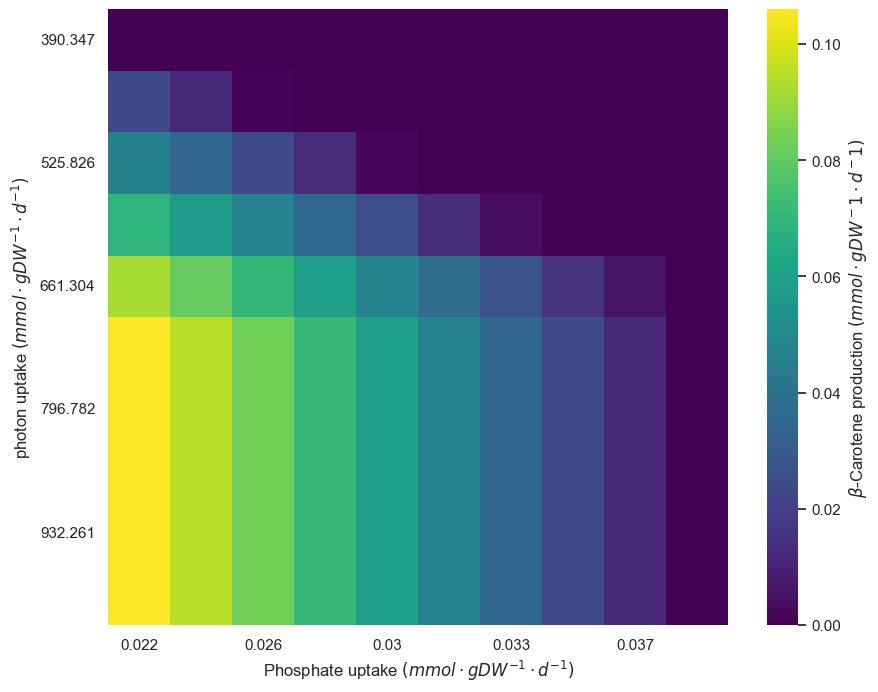

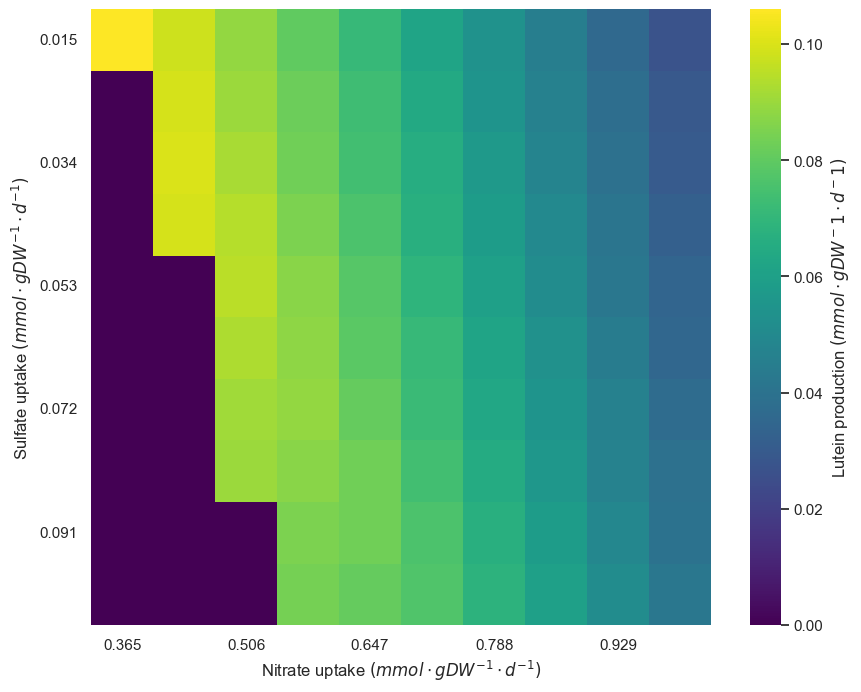

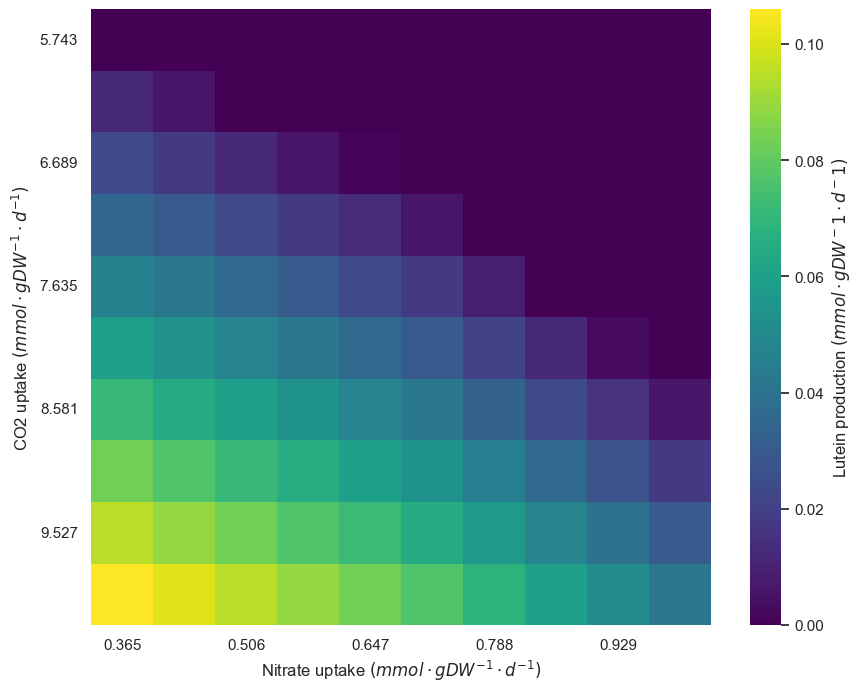

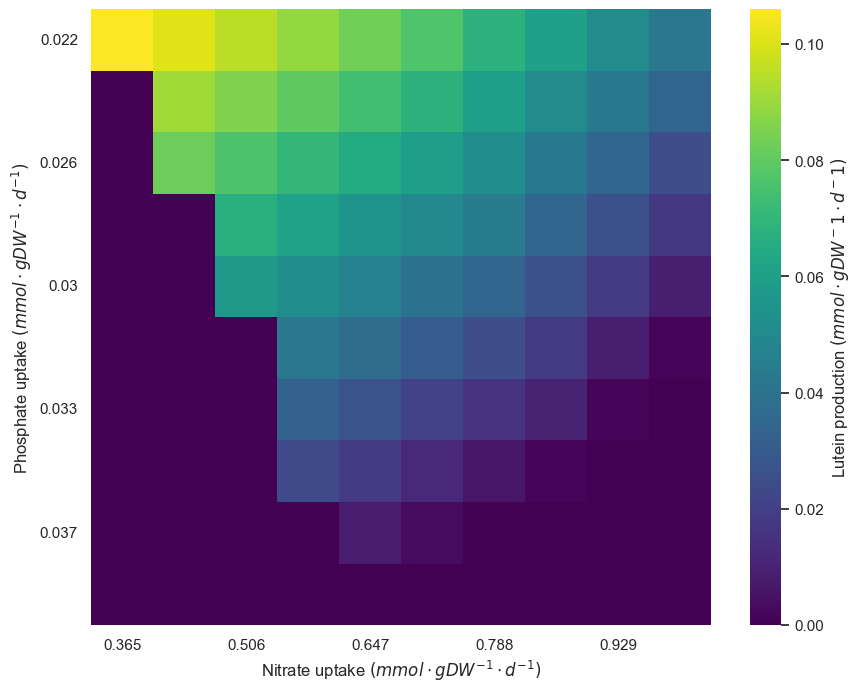

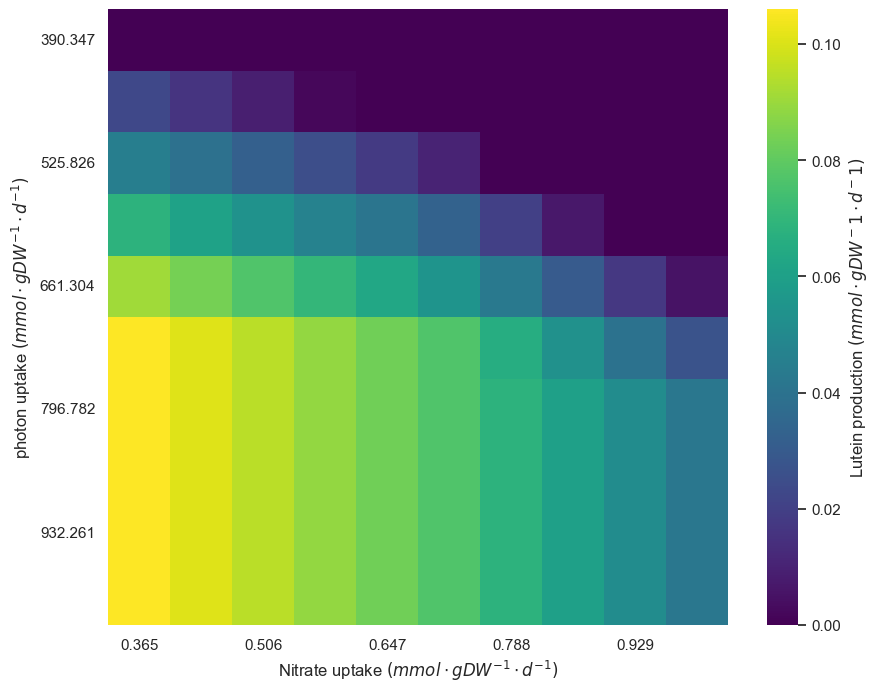

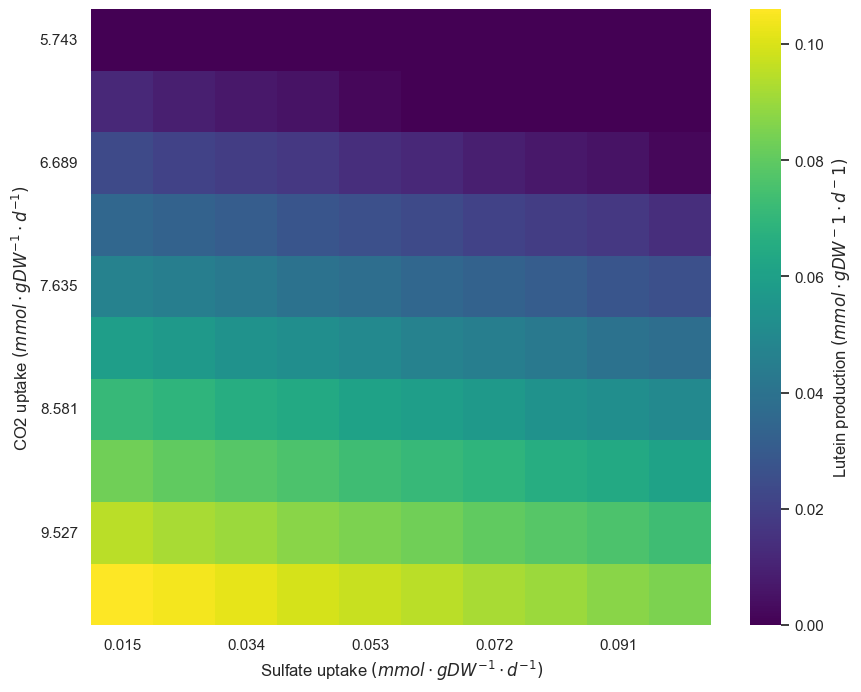

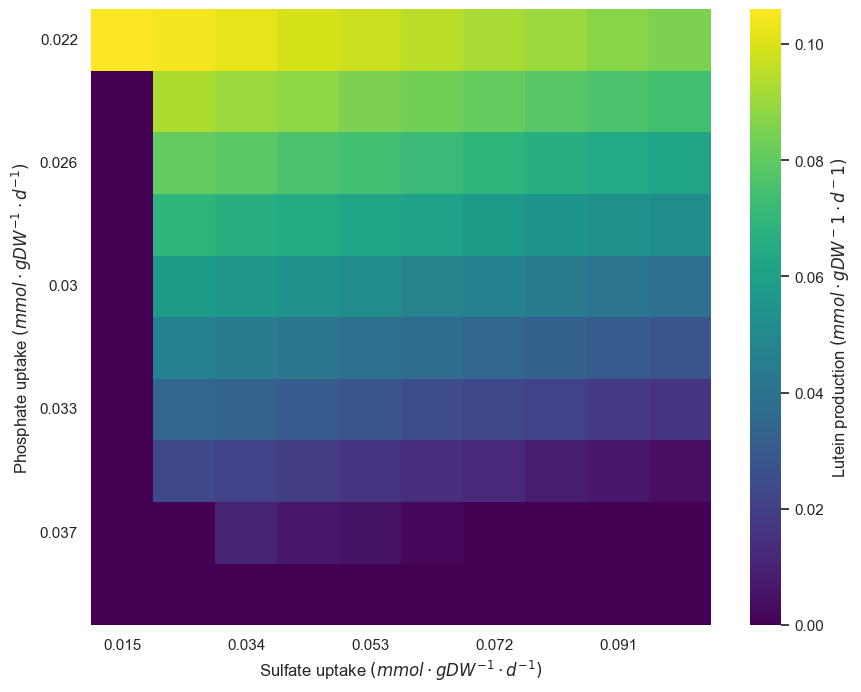

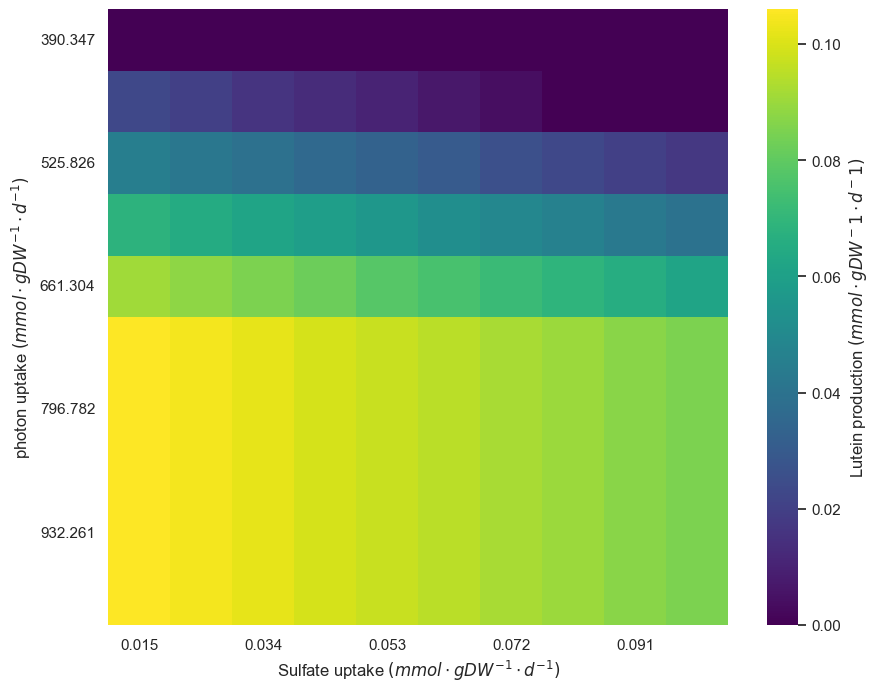

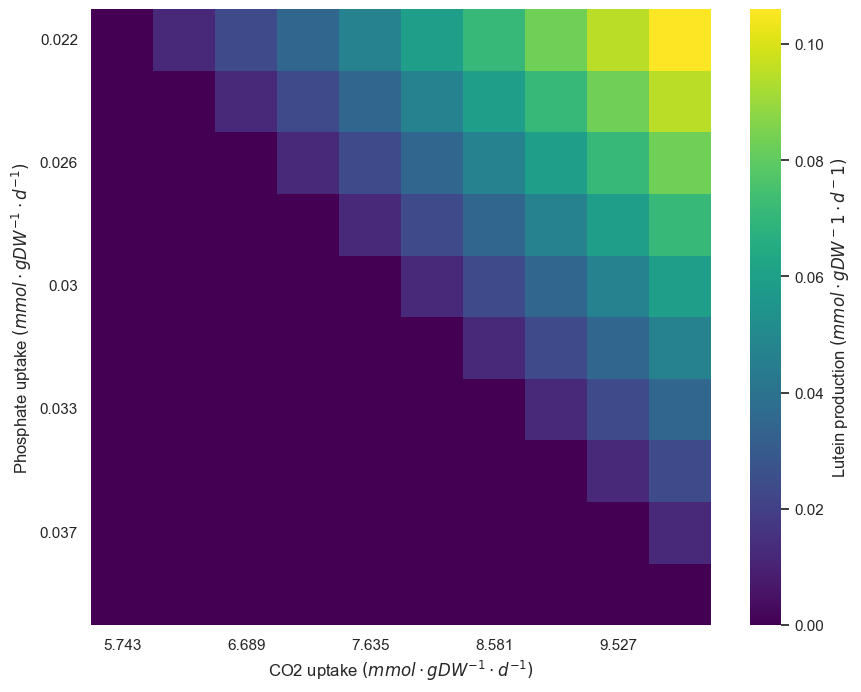

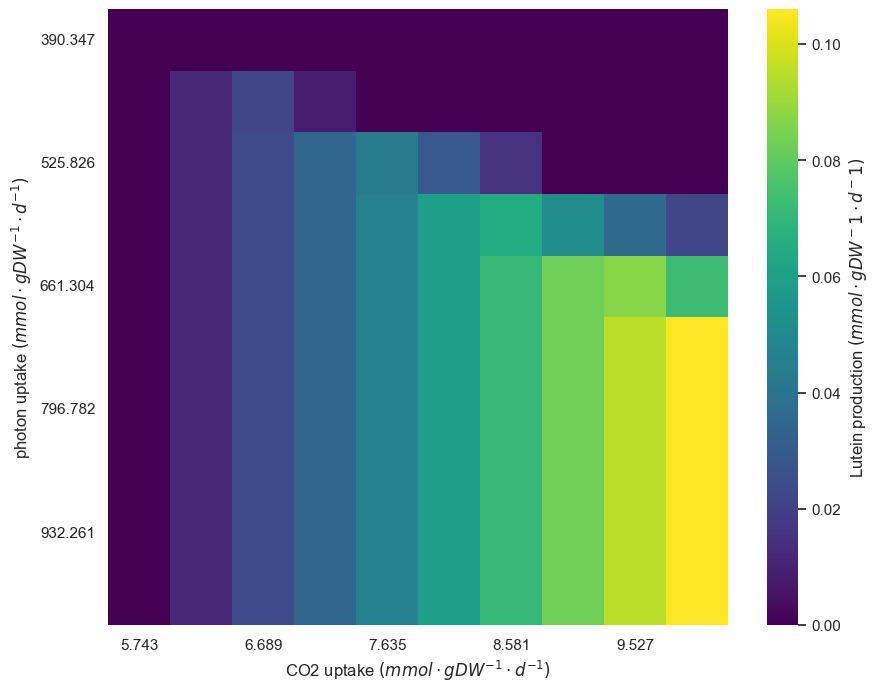

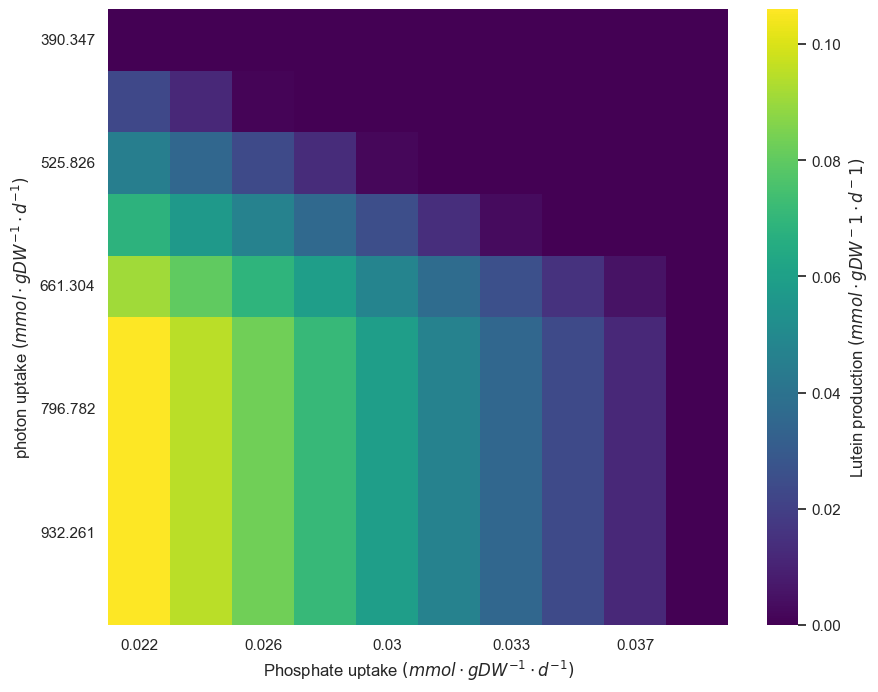

In [3]:
with original_model as model_max_carotenoid:
    model_max_carotenoid.exchanges.EX_C00244__dra.bounds = (-1,1000)
    model_max_carotenoid.demands.DM_C00244__cytop.bounds = (0,0)
    model_max_carotenoid.demands.DM_C00404__vacu.bounds = (0,0)
    model_max_carotenoid.exchanges.EX_C00533__dra.bounds = (0,0)
    model_max_carotenoid.exchanges.EX_C00014__dra.bounds = (0,0)
    model_max_carotenoid.exchanges.EX_C00009__dra.bounds = (-0.1,1000)
    model_max_carotenoid.exchanges.EX_C00059__dra.bounds = (-0.1,1000)
    model_max_carotenoid.reactions.e_Biomass__cytop.bounds = (0.14, 1000)
    model_max_carotenoid.exchanges.EX_C00205__dra.bounds = (-1000,1000)
    model_max_carotenoid.reactions.EX_C00011__dra.bounds = (-10, 1000)
    
    reactions_map = {"EX_C00205__dra": "photon uptake", "EX_C00244__dra": "Nitrate uptake", 
                         "EX_C00009__dra": "Phosphate uptake", "EX_C00011__dra": "CO2 uptake",
                         "EX_C00059__dra": "Sulfate uptake",
                         "DM_C02094__chlo": r"$\beta$-Carotene production", 
                     "DM_C08601__chlo": "Lutein production"
                    }
    nutrients = {
                "EX_C00205__dra",
                 "EX_C00244__dra",
                 "EX_C00009__dra",
                 "EX_C00011__dra",
                "EX_C00059__dra"}
    objectives = {"DM_C02094__chlo",
                  "DM_C08601__chlo"
                 }
    for objective in objectives:
        for combination in combinations(nutrients, 2):
            print(objective, combination)
            production_env_plot(model_max_carotenoid, reactions_map,  combination[0], combination[1], objective,
                               "max_carotenoid")

In [ ]:
with original_model as  model_max_biomass:
    model_max_biomass.exchanges.EX_C00244__dra.bounds = (-0.363,1000)
    model_max_biomass.demands.DM_C00244__cytop.bounds = (0,0)
    model_max_biomass.demands.DM_C00404__vacu.bounds = (0,0)
    model_max_biomass.exchanges.EX_C00533__dra.bounds = (0,0)
    model_max_biomass.exchanges.EX_C00014__dra.bounds = (0,0)
    model_max_biomass.exchanges.EX_C00009__dra.bounds = (-0.022,1000)
    model_max_biomass.exchanges.EX_C00059__dra.bounds = (-0.1,1000)
    model_max_biomass.exchanges.EX_C00205__dra.bounds = (-1000,1000)
    model_max_biomass.reactions.EX_C00011__dra.bounds = (-8.21, -8.21)
    reactions_map = {"EX_C00205__dra": "photon uptake", "EX_C00244__dra": "Nitrate uptake", 
                         "EX_C00009__dra": "Phosphate uptake", "EX_C00011__dra": "CO2 uptake",
                         "EX_C00059__dra": "Sulfate uptake",
                         "DM_C02094__chlo": r"$\beta$-Carotene production", "DM_C08601__chlo": "Lutein production",
                    "e_Biomass__cytop": "Growth rate"}
    nutrients = {
        "EX_C00205__dra", 
                 "EX_C00244__dra", "EX_C00009__dra", "EX_C00011__dra", "EX_C00059__dra",
                "DM_C02094__chlo", "DM_C08601__chlo"}
    objectives = {"e_Biomass__cytop"}
    for objective in objectives:
        for combination in combinations(nutrients, 2):
            print(objective, combination)
            production_env_plot(model_max_carotenoid, reactions_map,  combination[0], combination[1], objective,
                               "max_biomass")

e_Biomass__cytop ('EX_C00244__dra', 'DM_C08601__chlo')
e_Biomass__cytop ('EX_C00244__dra', 'EX_C00059__dra')
e_Biomass__cytop ('EX_C00244__dra', 'EX_C00011__dra')
e_Biomass__cytop ('EX_C00244__dra', 'DM_C02094__chlo')
e_Biomass__cytop ('EX_C00244__dra', 'EX_C00009__dra')
e_Biomass__cytop ('EX_C00244__dra', 'EX_C00205__dra')
e_Biomass__cytop ('DM_C08601__chlo', 'EX_C00059__dra')
e_Biomass__cytop ('DM_C08601__chlo', 'EX_C00011__dra')
e_Biomass__cytop ('DM_C08601__chlo', 'DM_C02094__chlo')
e_Biomass__cytop ('DM_C08601__chlo', 'EX_C00009__dra')
e_Biomass__cytop ('DM_C08601__chlo', 'EX_C00205__dra')
e_Biomass__cytop ('EX_C00059__dra', 'EX_C00011__dra')
e_Biomass__cytop ('EX_C00059__dra', 'DM_C02094__chlo')
e_Biomass__cytop ('EX_C00059__dra', 'EX_C00009__dra')
